<a href="https://colab.research.google.com/github/bayashi-cl/statistical-learning/blob/main/lab/02_StatisticalLearning_Lab_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from math import pi

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.graph_objects as go
from IPython.display import Image, display_png

sns.set()

# 2.3 Lab
## 2.3.1 基本コマンド

### 関数・代入

リストを作り、それを変数 `x` に代入する。

`np.array`で`numpy`の配列に変換できる。

In [2]:
x_list = [1, 6, 2]
x = np.array(x_list)
y = np.array((1, 4, 3))
print(x, y, sep="\n")

[1 6 2]
[1 4 3]


#### 関数の定義
```
def 関数名(引数):
  関数本体
```

返される値を`return`の後に記述する

In [3]:
def mul2(x):
  return x * 2

a = 5
print(mul2(5))

10


#### 配列の長さの取得

`len` 関数を使う

In [4]:
print(len(x))

3


#### 四則演算

`np.ndarray`に対してはスカラーと同様に足し算などができる。

In [5]:
print(4 + 3)
print(x + y)

7
[ 2 10  5]


#### 変数の確認・削除

変数の削除は `del` 文でできる。

In [53]:
a = 4
del a
try:
  print(a)
except NameError as e:
  print(e)


name 'a' is not defined


#### 等差数列の作成

`np.arange`や`np.linspace`を使う

In [7]:
# 初項・末項を半開区間で指定（公差は1）
print(np.arange(0, 6))

# 初項・末項・項数を指定
print(np.linspace(-pi, pi, 6))

[0 1 2 3 4 5]
[-3.14159265 -1.88495559 -0.62831853  0.62831853  1.88495559  3.14159265]


#### 行列の作成

`np.ndarray`で行列も表現できる

In [8]:
# 1*4のベクトルを2*2の行列に変換
x = np.arange(4).reshape((2, -1))
print(x)
# 変換の向きを変更する
y = np.arange(4).reshape((2, -1), order = "F")
print(y)

[[0 1]
 [2 3]]
[[0 2]
 [1 3]]


#### 行列演算


In [9]:
# 各要素に対する操作
print(np.sqrt(x))
print(x**0.5)

# 行列の積
print(x @ y)

[[0.         1.        ]
 [1.41421356 1.73205081]]
[[0.         1.        ]
 [1.41421356 1.73205081]]
[[ 1  3]
 [ 3 13]]


#### 乱数生成

`np.random.randn`, `np.random.normal` 関数で正規分布に従う乱数を生成できる

In [10]:
x = np.random.randn(50)
y = x + np.random.normal(loc=50, scale=0.1, size=50)
# ベクトル同士の共分散を計算
print(np.corrcoef(x, y))

[[1.         0.99321489]
 [0.99321489 1.        ]]


#### 乱数の固定

seedを固定することで同じ乱数が生成されるようになる。

In [11]:
print(np.random.randn(5))
print(np.random.randn(5))
print("\nset seed 1303")
np.random.seed(1303)
print(np.random.randn(5))
print("\nset seed 1303")
np.random.seed(1303)
print(np.random.randn(5))
print(np.random.randn(5))

# 注意：同じseedから常に同じデータが生成されるのではなく、データが生成される"順番"が同じになる。

[ 0.5590093   1.47142392  0.970193   -0.50397762  0.17260531]
[ 1.01089585  0.20939665 -1.40486079  0.16919431  1.5811144 ]

set seed 1303
[-0.03425693  0.06035959  0.45511859 -0.36593175 -1.6773304 ]

set seed 1303
[-0.03425693  0.06035959  0.45511859 -0.36593175 -1.6773304 ]
[ 0.5910023   0.41090101  0.46972388 -1.50462476 -0.70082238]


#### 基本統計量の計算

それぞれ対応する関数がある

In [12]:
np.random.seed(3)
x = np.random.randn(100)
print("平均")
print(x.mean())
print("分散")
print(x.var())
print("標準偏差")
print(x.std())

平均
-0.10863707440606224
分散
1.132081888283007
標準偏差
1.0639933685333791


## 2.3.2 グラフの作成

`matplotlib`パッケージを使う


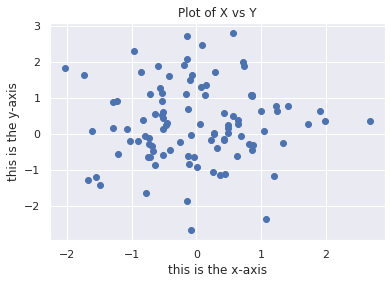

In [13]:
x_norm = np.random.randn(100)
y_norm = np.random.randn(100)
# 散布図を作成
plt.scatter(x_norm, y_norm)
plt.xlabel("this is the x-axis")
plt.ylabel("this is the y-axis")
plt.title("Plot of X vs Y")
# 作成したグラフを表示
plt.show()

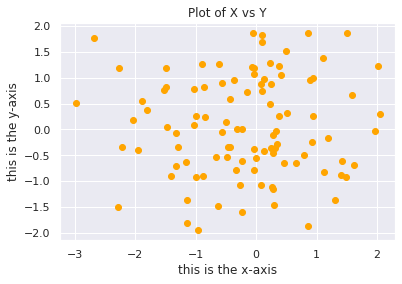

In [14]:
x_norm = np.random.randn(100)
y_norm = np.random.randn(100)
plt.scatter(x_norm, y_norm, color="orange")
plt.xlabel("this is the x-axis")
plt.ylabel("this is the y-axis")
plt.title("Plot of X vs Y")
# グラフを保存する
plt.savefig("fig.png")

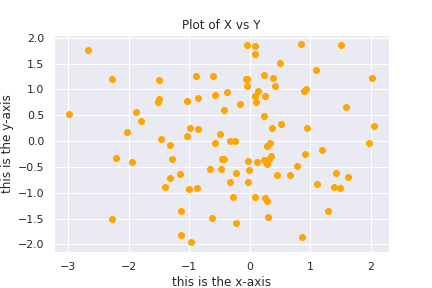

In [15]:
display_png(Image("fig.png"))

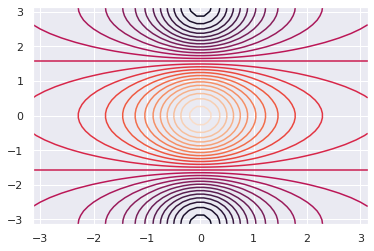

In [16]:
def fun(X, Y):
  return np.cos(y) / (1 + X**2)
x_axis = np.linspace(-pi, pi, 50)
y_axis = np.linspace(-pi, pi, 50)
x, y = np.meshgrid(x_axis, y_axis)
f = fun(x, y)

# 等高線グラフ
plt.contour(x, y, f, levels=30)
plt.show()

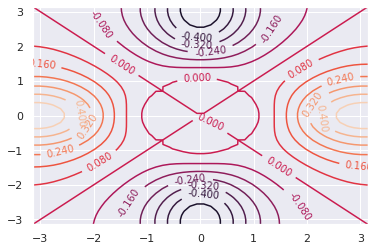

In [17]:
fa = (f - f.T) / 2
cs = plt.contour(x, y, fa, levels=15)
plt.clabel(cs)
plt.show()

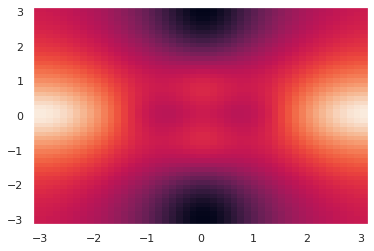

In [18]:
# ヒートマップ
plt.pcolor(x, y, fa)
plt.show()

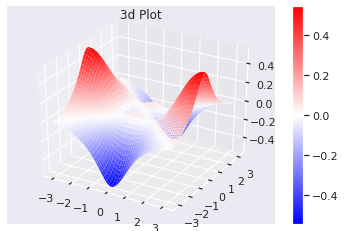

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, fa, cmap='bwr', linewidth=0)
fig.colorbar(surf)
ax.set_title("3d Plot")
plt.show()

#### plotly

plotlyを使うと動かせるグラフを作ることができる

In [20]:
fig = go.Figure(data=[go.Surface(z=fa, x=x, y=y)])
fig.show()

## 2.3.3 行列に対する操作

行列に対して、特定の行や列を抜き出すことができる。

In [21]:
A = np.arange(16).reshape((4, -1))
print(A)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [29]:
# 特定の要素を取り出す
print(A[2, 3])

# 特定の行・列を抽出する
print(A[[1, 3]][:,[0, 2]])

# shape関数で各次元の要素数を得られる
print(A.shape)

11
[[ 4  6]
 [12 14]]
(4, 4)


## 2.3.4 データの読み込み

`pandas`ライブラリを使ってcsvなどの形式で保存されているデータを読み込む


<!-- 
`na.strings = "?"`を指定することで欠損値を`?`で置き換える

`stringsAsFactors = T`を指定することで文字列を因子として扱う

`na.omit`関数で欠損値を含むデータを除外する

項目名は`names`関数で取得できる -->

In [36]:
Auto = pd.read_csv("https://www.statlearning.com/s/Auto.csv", na_values="?")
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [43]:
# 列名の取得
print(Auto.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')


In [39]:
# 欠損値の除去
Auto = Auto.dropna(how="any")
Auto.shape

(392, 9)

#### グラフと統計量

`matplotlib`のラッパー `seaborn`を使ってグラフを描画する

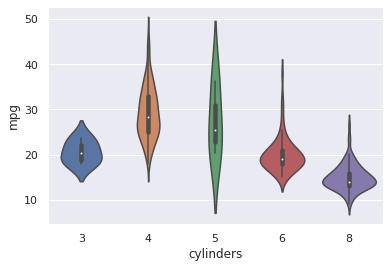

In [46]:
sns.violinplot(data=Auto, x="cylinders", y="mpg")
plt.show()

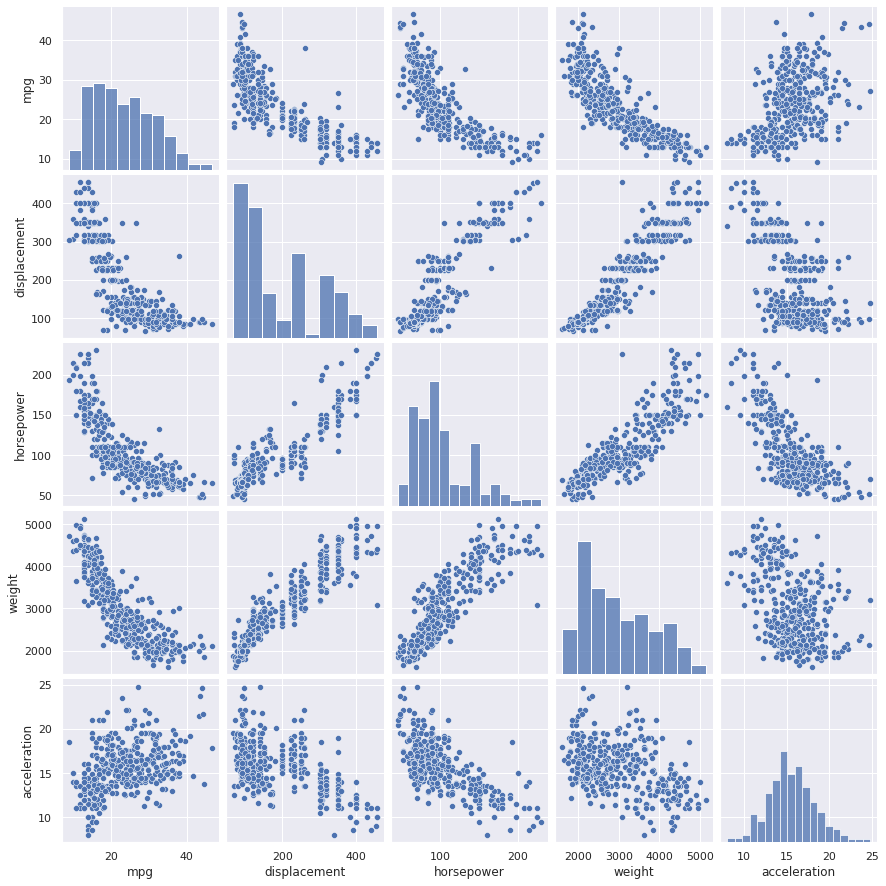

In [49]:
sns.pairplot(Auto[["mpg", "displacement", "horsepower", "weight", "acceleration"]])
plt.show()

In [51]:
# データの要約
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000
